In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [80]:
df_orig

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
df_orig = pd.read_csv('train.csv')

In [2]:
df = pd.read_csv('train.csv')

In [172]:
df_orig['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [3]:
df.count(axis = 0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df = df.drop(['Ticket'], axis = 1)

In [8]:
df.shape

(891, 11)

# checking NaN values across df

In [50]:
df.isnull().sum()

PassengerId      0
Survived         0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
First            0
Second           0
Third            0
dtype: int64

### PLAN

1. ~~Pclass - split into first-class | second-class | third-class~~
2. Name - split into Doctors |  Nobility | ~~Married~~
3. Sex - split into male | female
4. Age - Group into Baby | Children | Young-Adults | Middle-Aged | Pensioners
5. SibSp - Alone | With-Spouse | With-Sibling
6. Parch - With-Parent | With-Child
7. Ticket DROP
8. Fare - Normalize Prices
9. Cabin - A | B | C | D | E (sklearn imputation based on class, alone, fare)
10. Embarked - S | C | Q 


+11 - Travelling Alone - 0 | 1 (based on SibSp, Parch, CabinShare?)


# FE for PClass

In [9]:
#checking content/values of column
df['Pclass'].unique()

array([3, 1, 2])

In [10]:
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [11]:
cols = df[['Pclass']]

In [12]:
ohc.fit(cols)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [13]:
t = ohc.transform(cols)
print(t.shape)

(891, 3)


In [14]:
#above transforms the columns Pclass into three new columns
Class = pd.DataFrame(t, columns=('First', 'Second', 'Third'))
Class.head()

#condense code
# Class = pd.DataFrame()

,First,Second,Third
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [15]:
Class.shape

(891, 3)

In [16]:
df.shape

(891, 11)

In [17]:
hotclass = [df, Class]

In [18]:
df = pd.concat(hotclass, axis = 1)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,First,Second,Third
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,1.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1.0,0.0,0.0


In [21]:
df.drop(['Pclass'], axis = 1, inplace = True)

In [27]:
df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,First,Second,Third
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,0.0,1.0,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,1.0,0.0,0.0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,0.0,0.0,1.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1.0,0.0,0.0


## train / test steps

1. set X and y variables and check they are matching length (and that X is a df)
2. split train/test data via tuple unpacking (and check lengths)
3. apply LogisticRegression and fit model to training data
        m = LogisticRegression()
        m.fit(Xtrain, ytrain)
4. Check number of coeffs and intercept, check score for training data set
5. Check score for test dataset and compare

+6. Scatterplot can help visualize the data

In [28]:
X = df[['First', 'Second','Third']]
y = df['Survived']

X.shape, y.shape

((891, 3), (891,))

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((712, 3), (179, 3), (712,), (179,))

In [32]:
m = LogisticRegression()
m.fit(Xtrain, ytrain)

LogisticRegression()

In [33]:
m.coef_, m.intercept_

(array([[ 0.7217102 ,  0.1050159 , -0.82673167]]), array([-0.22256353]))

In [34]:
m.score(Xtrain, ytrain)

0.6671348314606742

In [35]:
m.score(Xtest, ytest)

0.7262569832402235

# Normalizing Fare
1. check NaN
2. normalize all values

In [53]:
df['Fare'].isna().sum()

0

In [55]:
scaler = MinMaxScaler()

In [ ]:
b

In [79]:
df_orig.min()

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
dtype: object

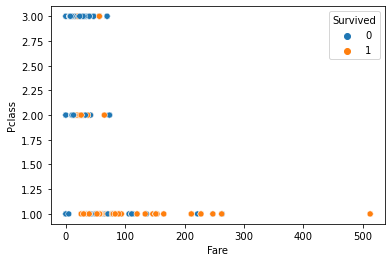

In [78]:
plotit = sns.scatterplot(data = df_orig, x = df_orig['Fare'], y = df_orig['Pclass'], hue = 'Survived')
#plotit.set(xlim=(0, 100))

## Grouping By Age
- by stacked KDE with bandwidth at 0.7 I can clearly see groups to put ages into

## Sorting Name Column
 - split string from left to comma
 - split from comma to space (remove dot)

In [91]:

# new data frame with split value columns
last = df["Name"].str.split(",", n = 1, expand = True)
title = last[1].str.split(".", n = 1, expand = True)
Fnoble = 

  
# making separate last name column from new data frame
df["Last Name"]= last[0]
  
# making separate title column from new data frame
df["Title"]= title[0]
df['Title'] = df['Title'].str.strip()

df.drop(columns =["Name2"], inplace = True)

#### separating married (females)

In [124]:
#df['name_match'] = df['first_name'].apply(lambda x: 'Match' if x == 'Bill' else 'Mismatch')
df['FMarried'] = df['Title'].apply(lambda x: 1 if x == 'Mrs' else 0)

In [125]:
df['FMarried'].value_counts()

0    766
1    125
Name: FMarried, dtype: int64

<AxesSubplot:xlabel='FMarried', ylabel='Count'>

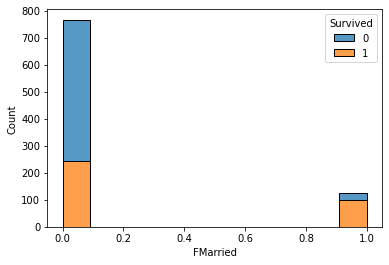

In [135]:
sns.histplot(data=df, x=df['FMarried'], hue="Survived", multiple="stack")

#### separating nobility

In [137]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Sir               1
Ms                1
Lady              1
Capt              1
Jonkheer          1
Mme               1
the Countess      1
Don               1
Name: Title, dtype: int64

In [146]:
df.loc[df['FMarried'] == 0, ['FMarried', 'Title']].value_counts()

FMarried  Title       
0         Mr              517
          Miss            182
          Master           40
          Dr                7
          Rev               6
          Col               2
          Major             2
          Mlle              2
          Capt              1
          Don               1
          Jonkheer          1
          Lady              1
          Mme               1
          Ms                1
          Sir               1
          the Countess      1
dtype: int64

In [157]:
# df['FNoble'] = df['Title'].apply(lambda x: 1 if x == 'Lady' else 0)
df['FNoble'] = df['Title'].str.contains('Lady|Countess', regex=True)

In [162]:
df['FNoble'].value_counts()

False    889
True       2
Name: FNoble, dtype: int64

In [161]:
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
cols = df[['FNoble']]
ohc.fit(cols)
t = ohc.transform(cols)

newdf = pd.DataFrame(t, columns=('FNoble'))

hotnew = [df, newdf]
df = pd.concat(hotnew, axis = 1)


#df.drop(['FNoble'], axis = 1, inplace = True)

TypeError: Index(...) must be called with a collection of some kind, 'FNoble' was passed

In [ ]:
# interpolation (and not fit linear method) to fill in NaN values for age
# multiple regression to predict cabin (name, class, ticket price) - 
    # check for linearity between the dependent and independent variables first - as linearity is an assumption of the model and will not work if not linear
    # there are various methods to introduce linearity to models

# outliers can cause issues with regression models and is best practice to remove them first